<h1 align = "center">Global Terrorism Database (GTD)</h1> 
<div align = "center">
The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.
</div>

<div align = "center" ><img src = "Assets/image.avif"></div>

</br>

# Library imports

In [1]:
import numpy as np  # ver 2.2.4
import pandas as pd  # ver 2.2.3
import seaborn as sb  # ver 0.13.2
import datetime as dt  # ver 5.5
import geopandas as gpd  # ver 1.1.1
import matplotlib.pyplot as plt  # ver 3.10.1
from shapely.geometry import Point  # shapely ver 2.1.1
from sklearn.linear_model import LinearRegression  # scikit-learn ver 1.7.0
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

</br>

## Data loading

In [2]:
try:
    data = pd.read_csv( "Input/globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1", low_memory = False )
    print( "Successfully loaded dataset!" )
except:
    print( "Coulnd't load data! Please retry." )

Successfully loaded dataset!


</br>

## Basic information about loaded data

In [3]:
data.info(  )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


</br>

## View of first 10 rows of loaded data

In [4]:
data.head( 4 ) # only 3 since it clutters too much

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


</br>

## Dataset columns

In [5]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

</br>

## Dataset shape ( rows, columns )

In [6]:
data.shape

(181691, 135)

</br>

## Relevant information about each column

In [7]:
data.describe(  )

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


</br>

## Number of NaN values for each column

In [8]:
data.isnull(  ).sum(  )

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

</br>

# Data Preprocessing and Cleaning

## Column renaming and data narrowing

Not really necessary but helpul in terms of readability and ease of use

In [9]:
new_general_column_names = {
    "iday": "Day",
    "imonth": "Month",
    "iyear": "Year",
    "longitude": "Longitude",
    "latitude": "Latitude",
    "country_txt": "Country",
    "region_txt": "Region",
    "provstate": "State_Province",
    "attacktype1_txt": "Attack_Type",
    "targtype1_txt": "Target_Type",
    "targsubtype1_txt": "Target_Subtype",
    "gname": "Terrorist_Group",
    "motive": "Motive",
    "weaptype1_txt": "Weapon_Type",
    "nkill": "Deaths",
    "nwound": "Injuries",
    "success": "Attack_Success",
    "suicide": "Suicide_Attack",
    "claimed": "Responsibility_Claimed",
}

new_hostage_ransom_column_names = {
    "ishostkid": "is_Hostage_Kidnap",
    "nhostkid": "n_Hostages",
    "nhostkidus": "n_Hostages_usa",
    "ransom": "Ransom_Demanded",
    "ransomamt": "Ransom_Amount",
    "ransomamtus": "Ransom_Amount_usd",
    "ransompaid": "Ransom_Paid",
    "ransompaidus": "Ransom_Paid_usd",
    "hostkidoutcome_txt": "Hostage_Outcome",
    "ndays": "Days_In_Captivity" # giorni di prigionia
}

# Rename columns for readability
data = data.rename( columns = new_general_column_names )
data = data.rename( columns = new_hostage_ransom_column_names )

data = data[list( new_general_column_names.values(  ) ) + list( new_hostage_ransom_column_names.values(  ) )]

</br>

## Delete NaN or invalid values/dates

In [10]:
# Drop rows that contain NaN values
data.dropna( axis = 0, how = "any" )

# Add unique date column
data["Date"] = pd.to_datetime( data["Day"].astype( str ) + "-" + data["Month"].astype( str ) + "-" + data["Year"].astype( str ),
                              errors = 'coerce' )

# Order by date and eliminate rows with invalid dates
data = data.dropna( subset = ["Date"] )
data = data.sort_values( "Date" ).reset_index( drop = True )

</br>

## Wolrd Map view of terrorist attacks from 1970 to 2017 ( except 1993 )

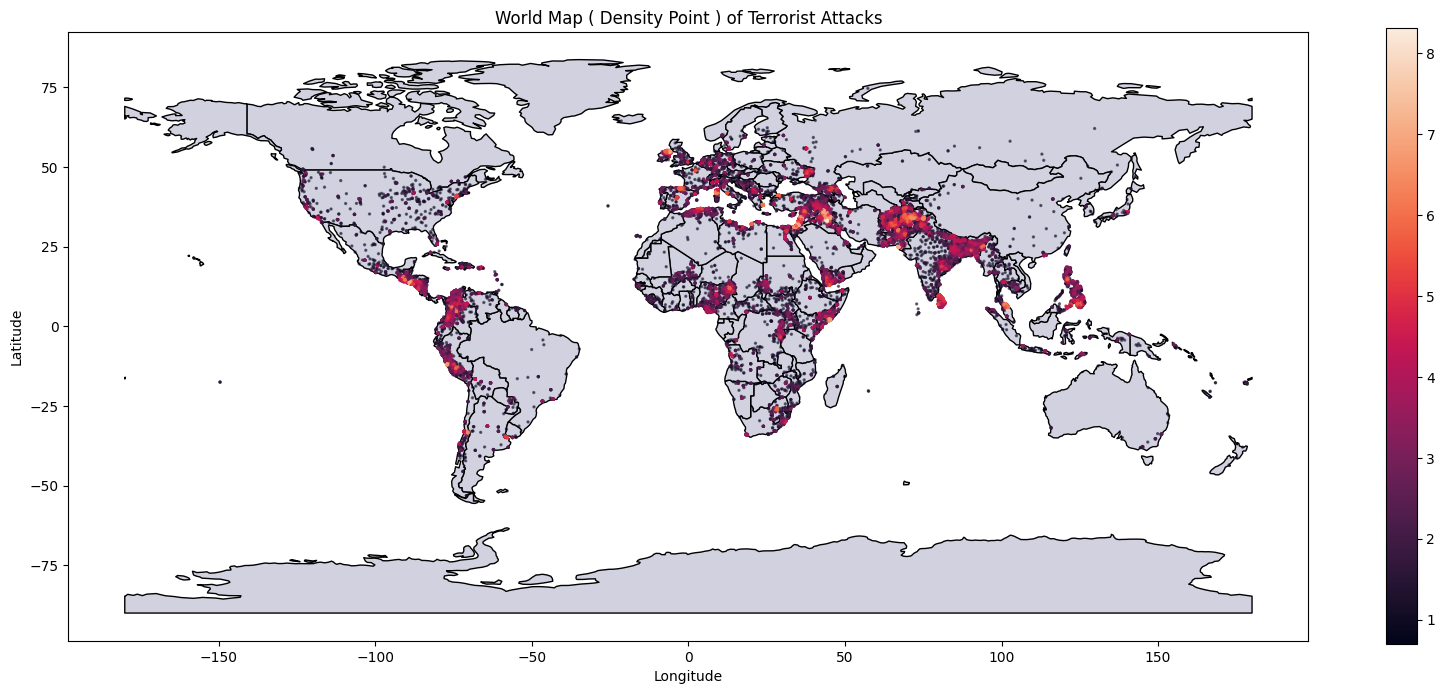

                      geometry  Longitude  Latitude   Density
0    POINT (-89.17627 37.0051)      -89.0      37.0  1.945910
1     POINT (-89.7443 43.4685)      -90.0      43.0  0.693147
2    POINT (-89.17627 37.0051)      -89.0      37.0  1.945910
3   POINT (-122.67563 45.5118)     -123.0      46.0  2.890372
4  POINT (-105.27055 40.01499)     -105.0      40.0  2.564949


In [11]:
# World map related data
world_map_df = data[["Longitude", "Latitude"]]

# Load map from file
world_map = gpd.read_file( "Auxiliary/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp" )

# Geometry data and GeoDataFrame
world_geometry = [Point(pos) for pos in zip( world_map_df["Longitude"], world_map_df["Latitude"] )]
world_df = gpd.GeoDataFrame( geometry = world_geometry, crs = "EPSG:4326" )

# Add density to points -> resolution specifies the detail ( the lower it is the higher will the area be )
resolution = 0 # -> 0: from 59.2x to 59.0, -1: from 59.2x to 60, 1: from 59.2x to 59.2, ecc.
world_df["Longitude"] = world_df.geometry.x.astype( float ).round( resolution )
world_df["Latitude"] = world_df.geometry.y.astype( float ).round( resolution )

world_df["Density"] = np.log1p( world_df.groupby( ["Longitude", "Latitude"] ).transform( "count" ) ) # adjust the scale, if linear small changes won't be as noticeable, thus we use log scale

# Plotting info
fig, ax = plt.subplots( figsize = ( 20, 8 ) )

# Plot map and overlay ( points )
world_map.plot( ax = ax, color = "#d1d1e0", edgecolor = "black" )
world_df.plot( ax = ax, column = world_df["Density"], cmap = "rocket", markersize = 2, alpha = 0.5, legend = True )
plt.title( "World Map ( Density Point ) of Terrorist Attacks" )
plt.xlabel( "Longitude" )
plt.ylabel( "Latitude" )
plt.show(  )

# Interesting info
print( world_df.head(  ) )

</br>

## Most targeted countries all time

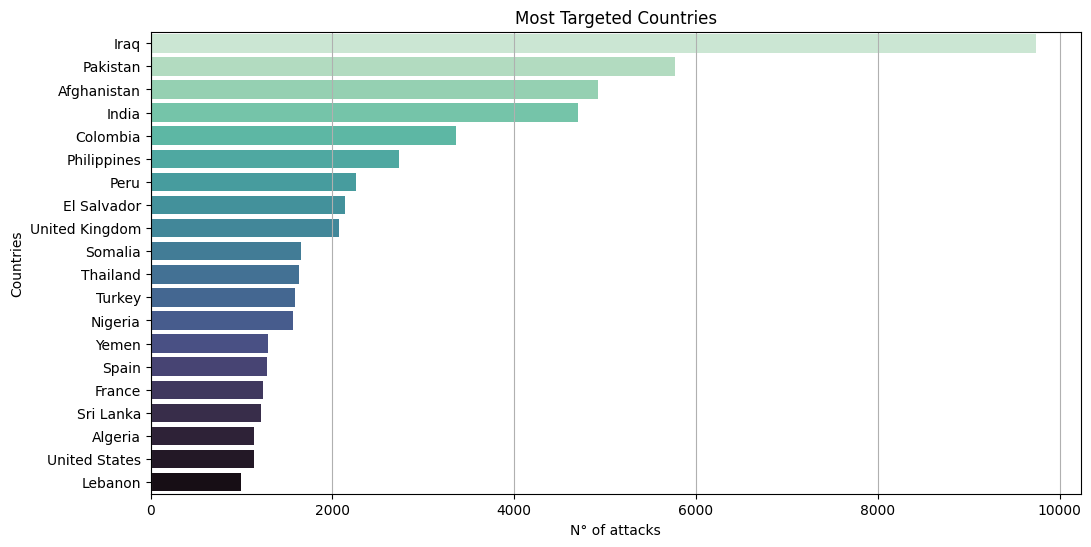

In [12]:
# Most trageted countries
targeted_countries_df = data["Country"].value_counts(  ).reset_index(  ).sort_values( by = "count", ascending = False ).head( 20 )

# Plot info + bar plot
plt.figure( figsize = ( 12, 6 ) )
sb.barplot( y = targeted_countries_df["Country"], x = targeted_countries_df["count"], palette = "mako_r", hue = targeted_countries_df["Country"] )

# Override dataframe plot info
plt.title( "Most Targeted Countries" )
plt.xlabel( "N° of attacks" )
plt.ylabel( "Countries" )
plt.grid( axis = "x" )

# Plot graph
plt.show(  )

</br>

## Total number of attacks each year

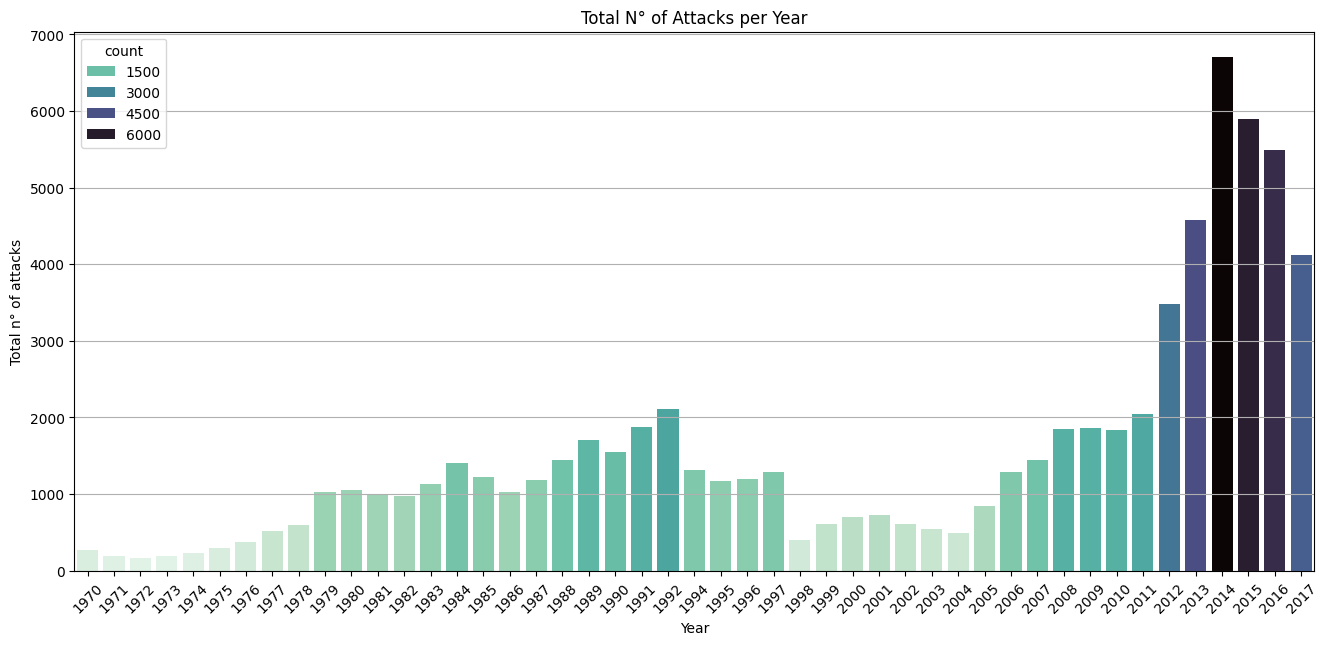

In [13]:
# Number of attacks yearly
attacks_per_year_df = data["Year"].value_counts(  ).reset_index(  ).sort_values( by = "Year", ascending = True )

# Plot info + bar plot
plt.figure( figsize = ( 16, 7 ) )
sb.barplot( x = attacks_per_year_df["Year"], y = attacks_per_year_df["count"], palette = "mako_r", hue = attacks_per_year_df["count"] )

# Override dataframe plot info
plt.title( "Total N° of Attacks per Year" )
plt.xlabel( "Year" )
plt.ylabel( "Total n° of attacks" )
plt.xticks( rotation = 45 )
plt.grid( axis = "y" )

# Plot graph
plt.show(  )

## Monthly activity

    Month  count     nMonth
0       1   5769    January
1       2   5844   February
2       3   5717      March
3       4   6186      April
4       5   6549        May
5       6   6467       June
6       7   6348       July
7       8   6179     August
8       9   5667  September
9      10   5939    October
10     11   5962   November
11     12   5385   December


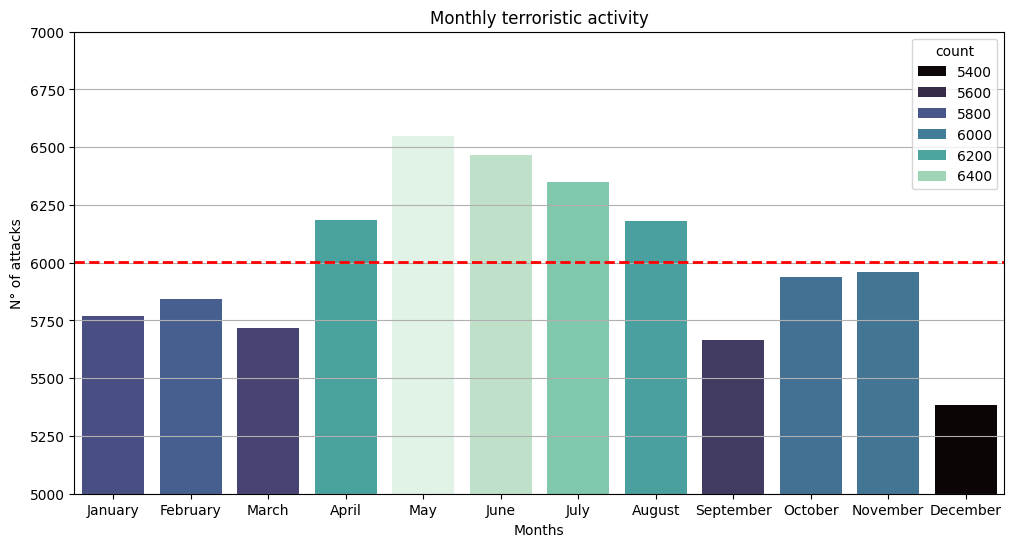

Average: 6001.0


In [14]:
# Monthly activity
monthly_df = data[["Month"]].value_counts(  ).sort_index(  ).reset_index(  )
monthly_df["nMonth"] = monthly_df["Month"].apply( lambda x: dt.date( 1900, x, 1 ).strftime( "%B" ) )
 
print( monthly_df.head( 12 ) )

# Plot info + bar plot ( with avg line )
plt.figure( figsize = ( 12, 6 ) )
sb.barplot( data=monthly_df, x = "nMonth", y = "count", palette = "mako", hue = "count" )

average =  monthly_df["count"].mean(  )
plt.axhline( y = average, color = "red", linestyle = "--", linewidth = 2, label = f"Average: { average }" )

# Override dataframe plot info
plt.title( "Monthly terroristic activity" )
plt.ylabel( "N° of attacks" )
plt.xlabel( "Months" )
plt.grid( axis = "y" )

# Plot graph
plt.ylim( 5000, 7000 )
plt.show(  )

# Info
print( f"Average: { average }" )

</br>

## Most active groups all time

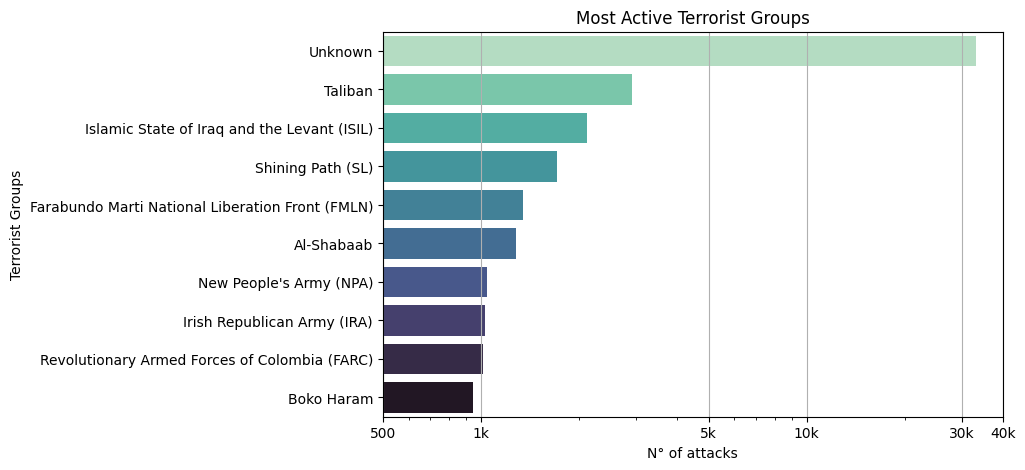

In [15]:
# Terrorist groups activity
activity_df = data["Terrorist_Group"].value_counts(  ).reset_index(  ).sort_values( by = "count", ascending = False ).head( 10 )

# Plot info + bar plot
plt.figure( figsize = ( 8, 5 ) )
bar_plot = sb.barplot( y = activity_df["Terrorist_Group"], x = activity_df["count"], palette = "mako_r", hue = activity_df["Terrorist_Group"] )
bar_plot.set_xscale( "log" )

# Override dataframe plot info
plt.xticks( [500, 1000, 5000, 10000, 30000, 40000], 
           ["500", "1k", "5k", "10k", "30k", "40k"] )
plt.title( "Most Active Terrorist Groups" )
plt.xlabel( "N° of attacks" )
plt.ylabel( "Terrorist Groups" )
plt.grid( axis = "x" )

# Plot graph
plt.show(  )

</br>

## Total amount of deaths by terrorist groups all time

                                  Terrorist_Group   Deaths
1994                                      Unknown  43822.0
892   Islamic State of Iraq and the Levant (ISIL)  17297.0
1846                                      Taliban  11459.0
441                                    Boko Haram   8171.0
1089      Liberation Tigers of Tamil Eelam (LTTE)   4790.0


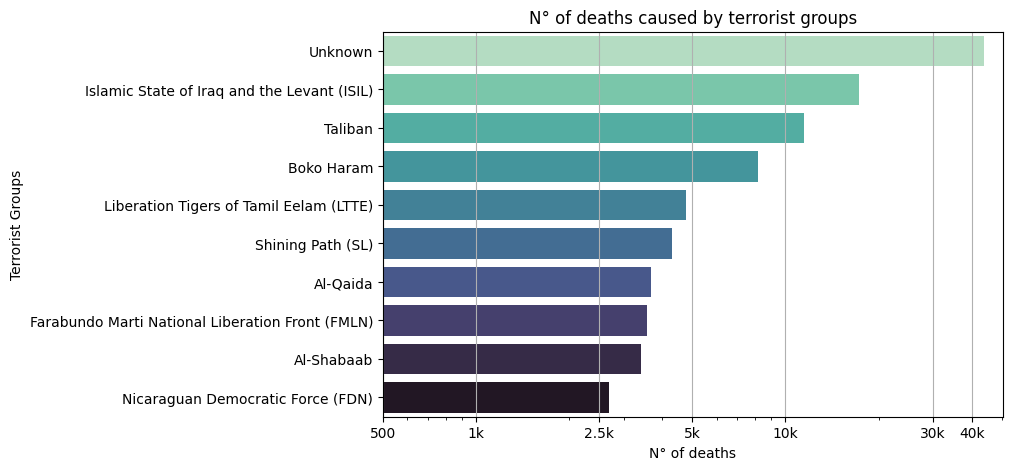

In [16]:
# Deaths by terrorist groups
deaths_by_group_df = data[["Terrorist_Group", "Deaths"]]

# Group by terrorist groups
grouped_df = deaths_by_group_df.groupby( "Terrorist_Group" ).sum(  ).reset_index(  ).sort_values( by = "Deaths", ascending = False ).head( 10 )

print( grouped_df.head(  ) )

# Plot info + bar plot
plt.figure( figsize = ( 8, 5 ) )
bar_plot = sb.barplot( y = grouped_df["Terrorist_Group"], x = grouped_df["Deaths"], palette = "mako_r", hue = grouped_df["Terrorist_Group"] )
bar_plot.set_xscale( "log" )

# Override dataframe plot info
plt.xticks( [500, 1000, 2500, 5000, 10000, 30000, 40000], 
           ["500", "1k", "2.5k", "5k", "10k", "30k", "40k"] )
plt.title( "N° of deaths caused by terrorist groups" )
plt.xlabel( "N° of deaths" )
plt.ylabel( "Terrorist Groups" )
plt.grid( axis = "x" )

# Plot graph
plt.show(  )

</br>

## Main terrorist groups targets all time

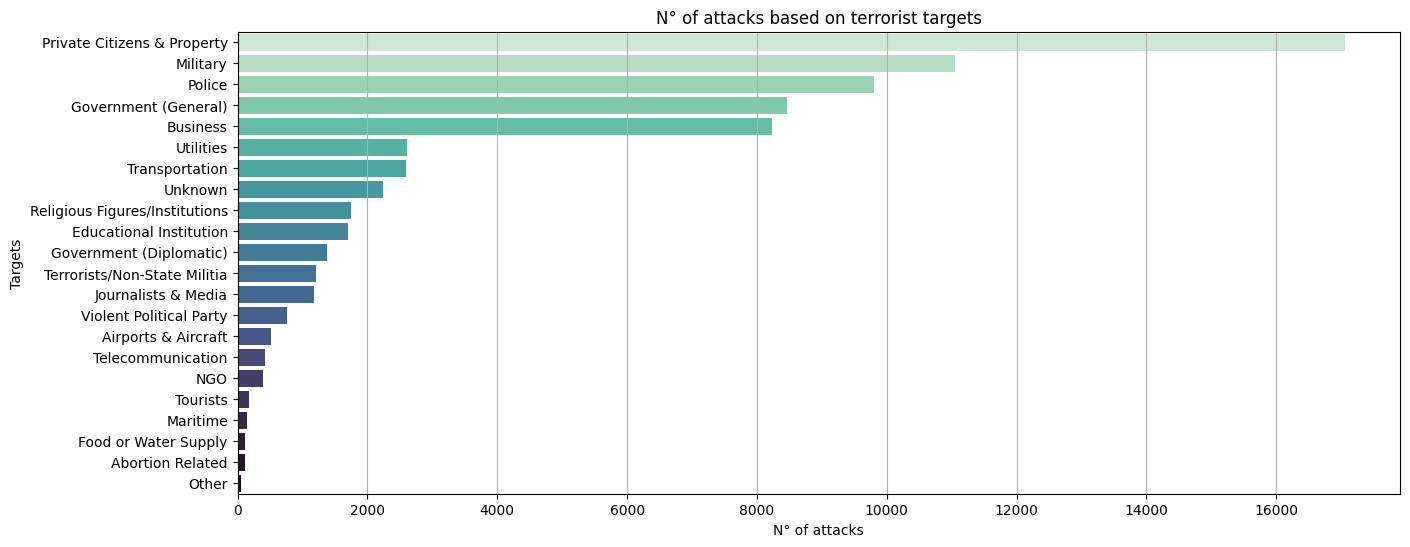

                      Target_Type  count
0     Private Citizens & Property  17053
1                        Military  11056
2                          Police   9810
3            Government (General)   8465
4                        Business   8238
5                       Utilities   2605
6                  Transportation   2598
7                         Unknown   2246
8  Religious Figures/Institutions   1755
9         Educational Institution   1709


In [17]:
# Main terrorist targets
targets_df = data["Target_Type"].value_counts(  ).reset_index(  )

# Plot info + bar plot
plt.figure( figsize = ( 15, 6 ) )
sb.barplot( y = targets_df["Target_Type"], x = targets_df["count"], palette = "mako_r", hue = targets_df["Target_Type"] )

# Override dataframe plot info
plt.title( "N° of attacks based on terrorist targets" )
plt.xlabel( "N° of attacks" )
plt.ylabel( "Targets" )
plt.grid( axis = "x" )

# Plot graph
plt.show(  )

# Interesting info
print( targets_df.head( 10 ) )

</br>

## Most common attack types

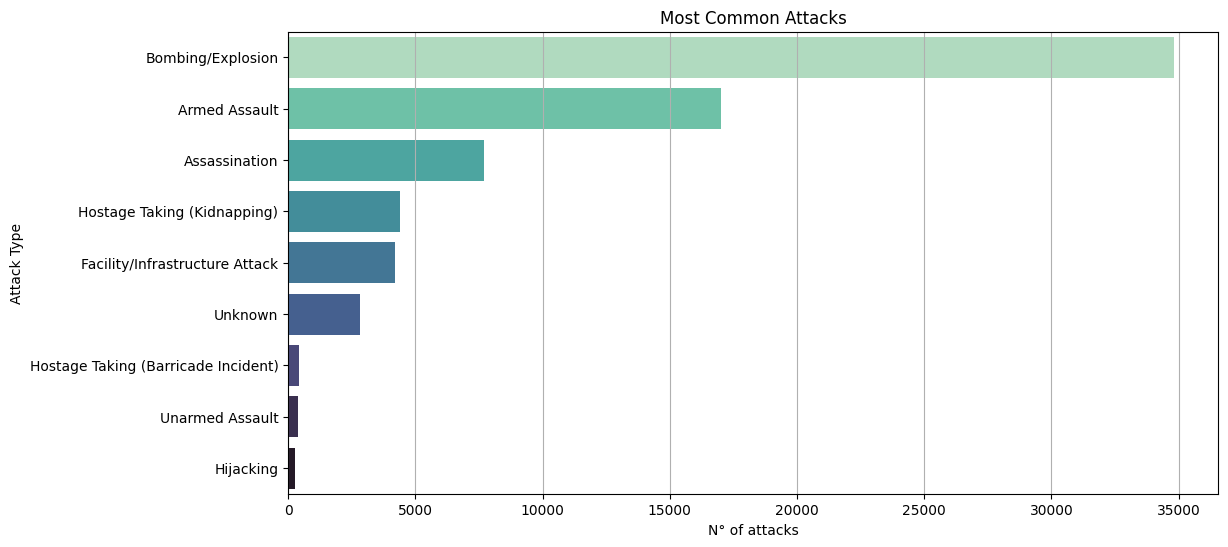

In [18]:
# Most common attack type
attack_df = data["Attack_Type"].value_counts(  ).reset_index(  )

# Plot info + bar plot
plt.figure( figsize = ( 12, 6 ) )
sb.barplot( y = attack_df["Attack_Type"], x = attack_df["count"], palette = "mako_r", hue = attack_df["Attack_Type"] )

# Override dataframe plot info
plt.title( "Most Common Attacks" )
plt.xlabel( "N° of attacks" )
plt.ylabel( "Attack Type" )
plt.grid( axis = "x" )

# Plot graph
plt.show(  )

</br>

## Deaths vs Injuries derived from each attack type

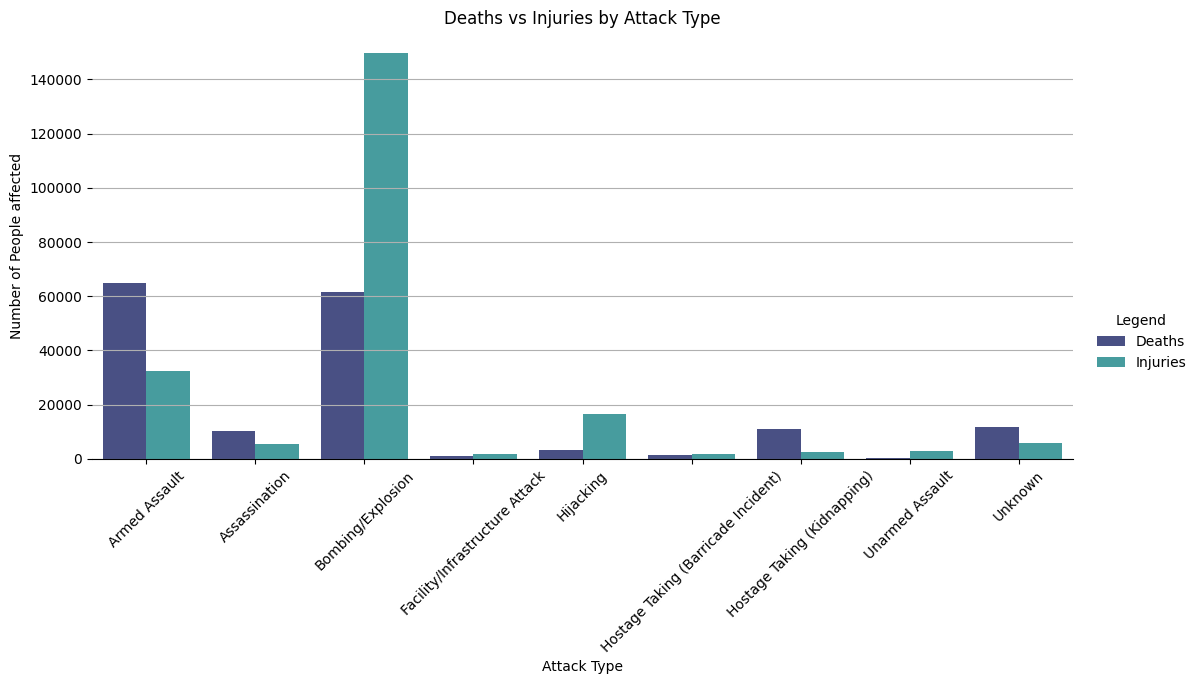

In [19]:
# Deaths vs Injuries by attack type
deaths_vs_injuries_df = data[["Attack_Type", "Deaths", "Injuries"]]

# Sum deaths and injuries for each attack type
grouped_df = deaths_vs_injuries_df.groupby( "Attack_Type" )[["Deaths", "Injuries"]].sum(  ).reset_index(  )
grouped_df = grouped_df.melt( id_vars = "Attack_Type", value_vars=["Deaths", "Injuries"], var_name = "Casualty_Type", value_name = "Count" )

# Plot nested barplot by deaths and injuries
plot = sb.catplot(
    data = grouped_df, kind = "bar", x = "Attack_Type", y = "Count", 
    hue = "Casualty_Type", palette = "mako", aspect = 2.2
)

# Plot info override
plot.despine( left = True )
plot.legend.set_title( "Legend" )

plt.title( "Deaths vs Injuries by Attack Type" )
plt.xlabel( "Attack Type" )
plt.ylabel( "Number of People affected" )
plt.xticks( rotation = 45 )
plt.grid( axis = "y" )

plt.show(  )

</br>

## Total amount of deaths caused by each attack type

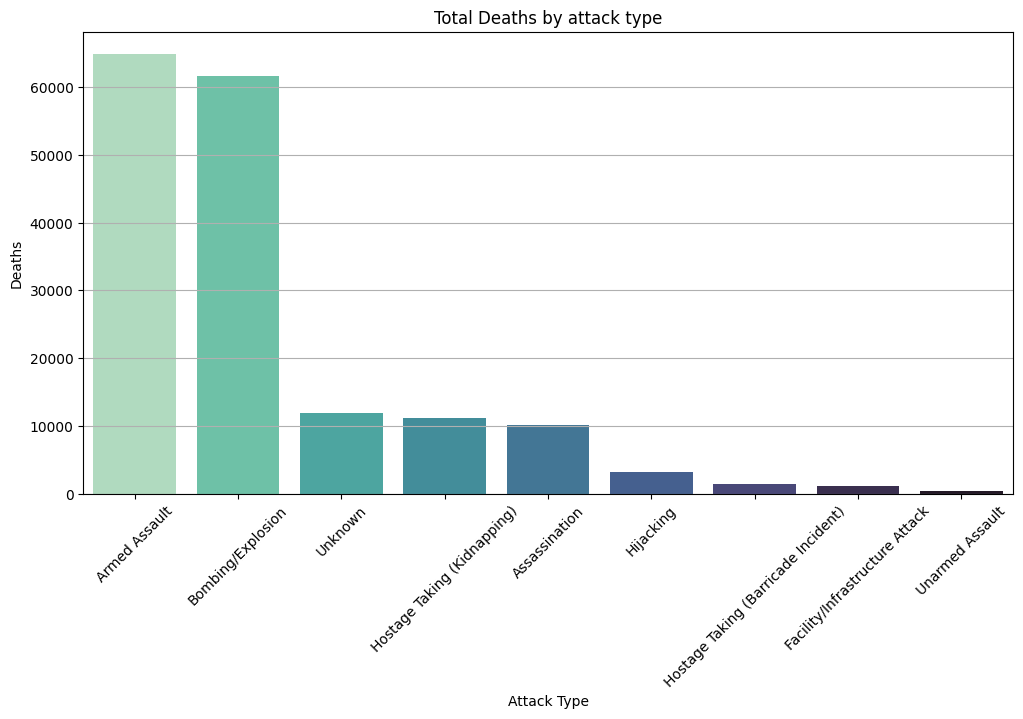

In [20]:
 # Deaths by attack type
death_by_weapon = data[["Attack_Type", "Deaths"]]

# Group by weapon type
grouped_df = death_by_weapon.groupby( "Attack_Type" )["Deaths"].sum(  ).sort_values( ascending = False )

# Plot info + bar plot
plt.figure( figsize = ( 12, 6 ) )
sb.barplot( x = grouped_df.index, y = grouped_df.values, palette = "mako_r", hue = grouped_df.index )

# Override dataframe plot info
plt.title( "Total Deaths by attack type" )
plt.xlabel( "Attack Type" )
plt.ylabel( "Deaths" )
plt.xticks( rotation = 45 )
plt.grid( axis = "y" )

# Plot graph
plt.show(  )

</br>

## Data regarding weapon usage and trends during the years

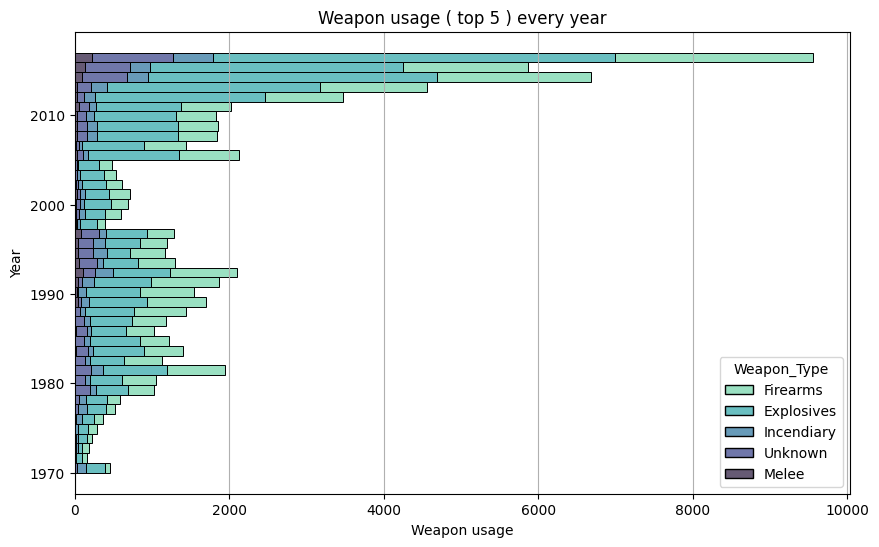

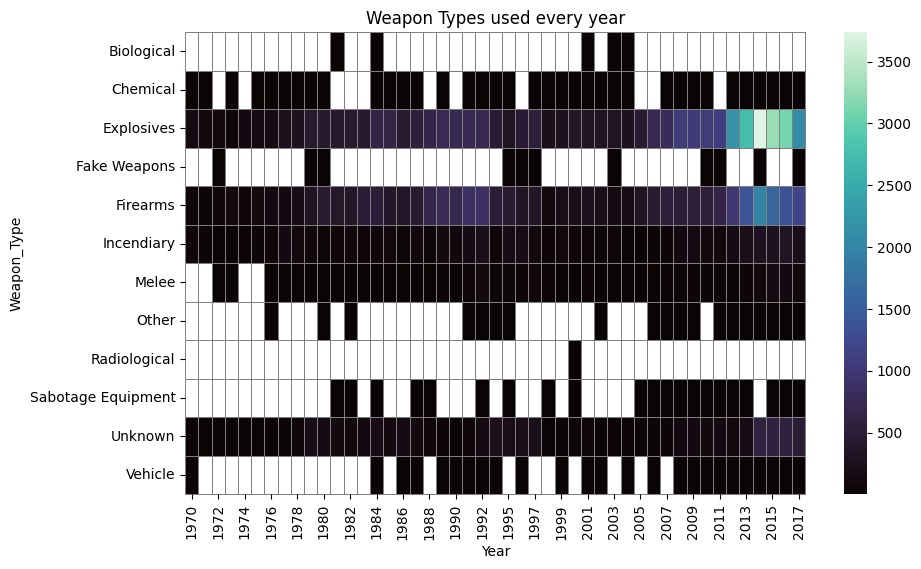

In [21]:
# Weapon data
weapons_df = data[["Year", "Weapon_Type"]]
weapons_df = weapons_df.dropna( subset = ["Year", "Weapon_Type"] )

# Weapon hist plot
hist_df = weapons_df["Weapon_Type"].value_counts(  ).head( 5 ).index
hist_df = weapons_df[weapons_df["Weapon_Type"].isin( hist_df )]

plt.figure( figsize = ( 10, 6 ) )

sb.histplot( data = hist_df, y = "Year", hue = "Weapon_Type", multiple = "stack", palette = "mako_r" )
plt.grid( axis = "x" )
plt.title( "Weapon usage ( top 5 ) every year" )
plt.xlabel( "Weapon usage" )
plt.ylabel( "Year" )

# Change data arrangement to suit heatmap argument type
weapons_2d = weapons_df.groupby( ["Weapon_Type", "Year"] ).size(  ).unstack(  )
weapons_2d.index = weapons_2d.index.str.replace( r"\s*\(.*", "", regex = True ) # remove contents of parenthesis in the Vehicle category string

# Plot info
plt.figure( figsize = ( 10, 6 ) )
plt.title( "Weapon Types used every year" )
plt.xlabel( "Year" )
plt.ylabel( "Weapon usage" )


# Plot heatmap
sb.heatmap( weapons_2d, cmap = "mako", linewidths = .5, linecolor = "gray", clip_on = False )
plt.show(  )

</br>

## Correlation analysis

In [22]:
# Copy of base data -> hostage and kidnapping data is relevant only when "is_Hostage_Kidnap" ( previously "ishostkid" ) == 1
is_Hostage_Kidnap_data = data[( data["is_Hostage_Kidnap"] == 1.0 ) & ( data["Ransom_Demanded"] == 1.0 )].copy(  )

# Selecting columns of interest
corr_df = is_Hostage_Kidnap_data[["Year", "n_Hostages", "n_Hostages_usa", "Ransom_Amount", "Ransom_Amount_usd", "Ransom_Paid", "Ransom_Paid_usd", "Days_In_Captivity"]]
corr_df = corr_df.replace( -99.0, np.nan )
for col in corr_df.columns:
    corr_df.loc[:, col] = pd.to_numeric( corr_df[col], errors = "coerce" )

</br>

From the following clustermap we can see that by using Pearson's correlation coefficient there are some columns that have some strong positive correlation values, respectively:
- Ransom_Amount <--> Ransom_Amount_usd
- n_Hostages_usa <--> Ransom_Amount_usd
- n_Hostages_usa <--> Ransom_Paid_usd

[]

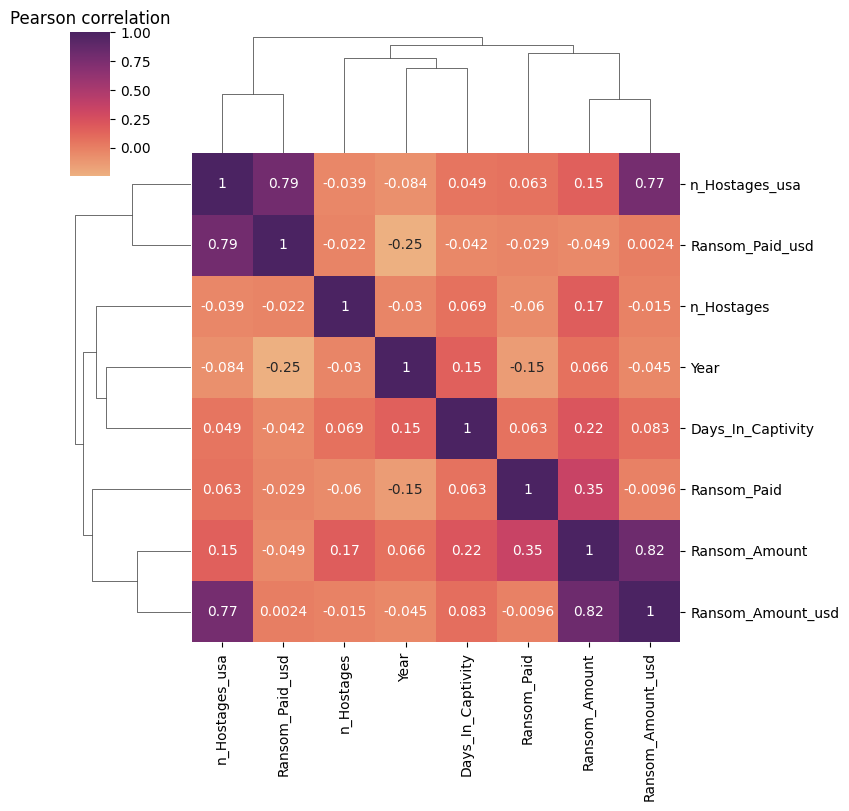

In [23]:
# Pearson correlation
pearson_corr = corr_df.corr( method = "pearson" )

# Plot pearson correlation
sb.clustermap( pearson_corr, cmap = "flare", annot = True, figsize = ( 8, 8 ) )
plt.title( "Pearson correlation" )
plt.plot(  )

</br>

We'll be studying the latter as **Ransom_Amount** and **Ransom_Amount_usd** were bount to have that values as they represent the same data just in different ways ( Ransom_Amount represents the amount of money demanded in the country's currency where the hostage situation/kidnapping took place, and Ransom_Amount_usd is just that amount of money converted in dollars ). </br>
Though one may raise the question of why then are they not a perfect 1? Answer: It's probably caused by the fact that different currencies have different exchange rates.

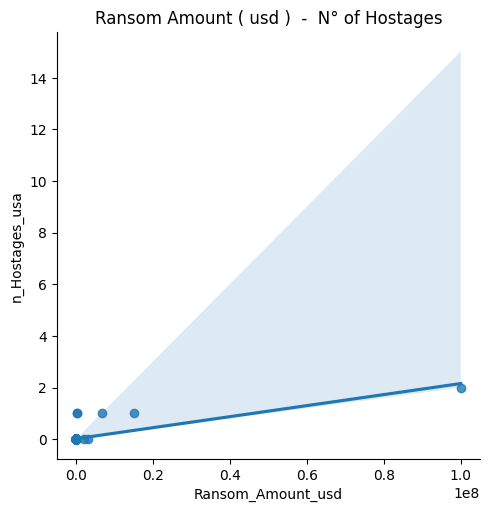

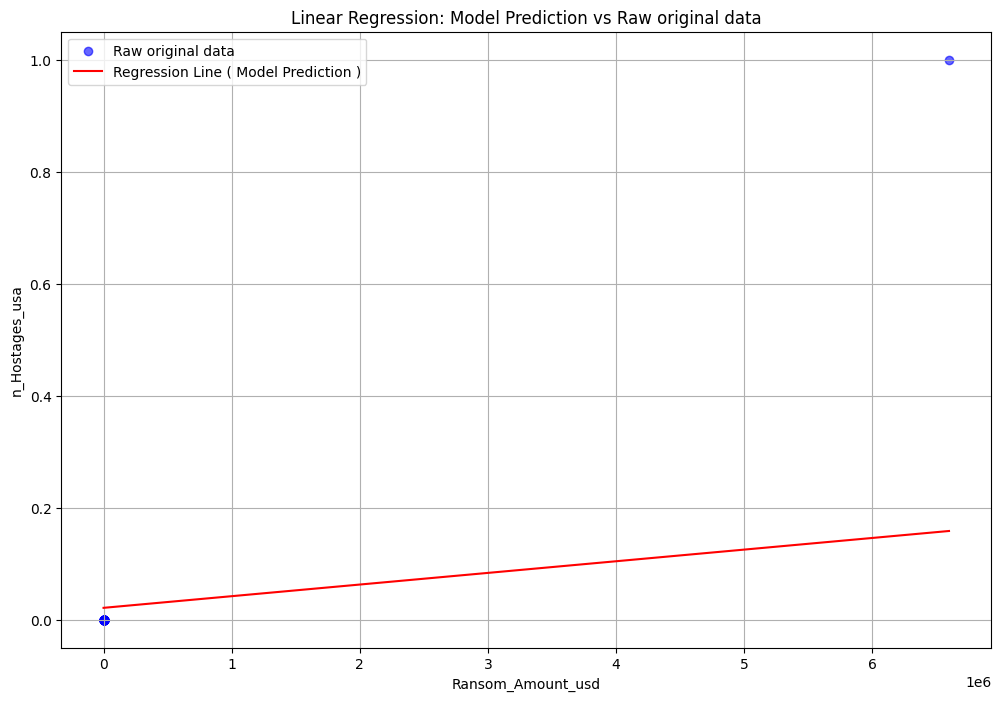

Linear Score: 0.25
Polynomial Score: 0.69


In [24]:
# Corr columns of interest
col1 = "Ransom_Amount_usd"
col2 = "n_Hostages_usa"

# NaN free df
study_df = corr_df[[col1, col2]].dropna(  ).sort_values( by = col1, ascending = False )

# Plot raw data ( not correlation data ) + linear regression line
sb.lmplot( data = study_df, x = col1, y = col2 )

plt.title( "Ransom Amount ( usd )  -  N° of Hostages" )
plt.show(  )

# Train/test data
X, y = study_df[[col1]], study_df[col2]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.33, random_state = 42 )

# Linear regression model
reg_model = LinearRegression(  ).fit( X_train, y_train )
reg_model.score( X_train, y_train )

# Linear prediction
prediction = reg_model.predict( X_test )

linear_score = r2_score( y_test, prediction )

# Plot prediction data calculated by scikit
plt.figure( figsize = ( 12, 8 ) )
plt.scatter( X_test, y_test, color = "blue", label = "Raw original data", alpha = 0.6 )

# Regression line
sorted_X_test = X_test.sort_values( by = col1 )
sorted_prediction = reg_model.predict( sorted_X_test )

plt.plot( sorted_X_test, sorted_prediction, color = "red", label = "Regression Line ( Model Prediction )" )

# Plot info
plt.xlabel( col1 )
plt.ylabel( col2 )
plt.title( "Linear Regression: Model Prediction vs Raw original data" )
plt.legend(  )
plt.grid( True )
plt.show(  )

# Linear to polynomial data
p_features = PolynomialFeatures( degree = 2 )
X_poly = p_features.fit_transform( X_train )
X_test = p_features.transform(X_test)

# Polynomial model
poly_model = LinearRegression(  ).fit( X_poly, y_train )

# Polynomial prediction
prediction = poly_model.predict( X_test )

poly_score = r2_score( y_test, prediction )

print( f"Linear Score: {linear_score:.2f}" )
print( f"Polynomial Score: {poly_score:.2f}" )

</br>

Just for curiosity, the **Ransom_Amount** and **Ransom_Amount_usd** correlation analysis

Linear Score: 0.25


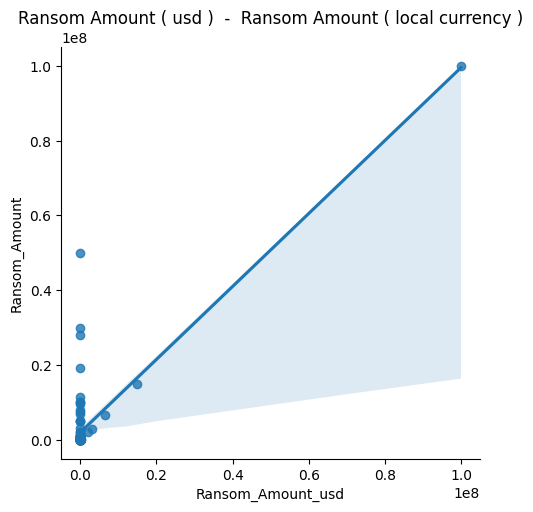

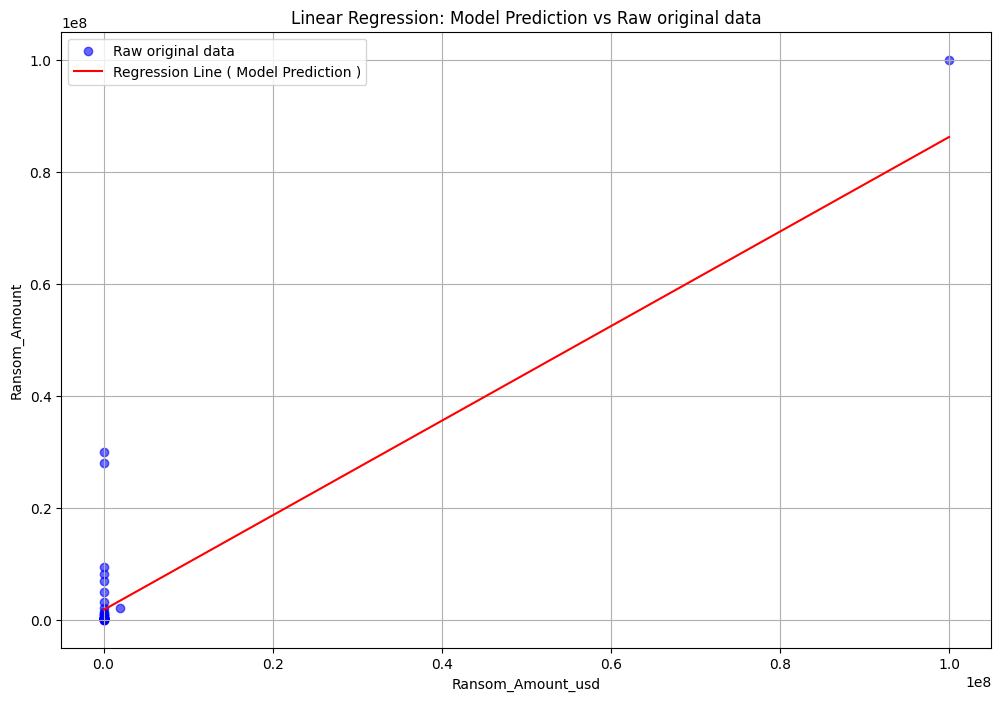

In [25]:
# NaN free df
study_df = corr_df[["Ransom_Amount_usd", "Ransom_Amount"]].dropna(  ).sort_values( by = "Ransom_Amount_usd", ascending = False )

# Train/test data
X, y = study_df[["Ransom_Amount_usd"]], study_df["Ransom_Amount"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.33, random_state = 42 )

# Linear regression model
reg_model = LinearRegression(  ).fit( X_train, y_train )
reg_model.score( X_train, y_train )

# Linear prediction
prediction = reg_model.predict( X_test )

score = r2_score( y_test, prediction )
print( f"Linear Score: {linear_score:.2f}" )

# Plot raw data ( not correlation data ) + linear regression line
sb.lmplot( data = study_df, x = "Ransom_Amount_usd", y = "Ransom_Amount" )

plt.title( "Ransom Amount ( usd )  -  Ransom Amount ( local currency )" )
plt.show(  )

# Plot prediction data calculated by scikit
plt.figure( figsize = ( 12, 8 ) )
plt.scatter( X_test, y_test, color = "blue", label = "Raw original data", alpha = 0.6 )

# Regression line
sorted_X_test = X_test.sort_values( by = "Ransom_Amount_usd" )
sorted_prediction = reg_model.predict( sorted_X_test )

plt.plot( sorted_X_test, sorted_prediction, color = "red", label = "Regression Line ( Model Prediction )" )

# Plot info
plt.xlabel( "Ransom_Amount_usd" )
plt.ylabel( "Ransom_Amount" )
plt.title( "Linear Regression: Model Prediction vs Raw original data" )
plt.legend(  )
plt.grid( True )
plt.show(  )

</br>

## Correlation study of more general data regarding terrorist attacks

In [26]:
# Copy of base data
general_data = data.copy(  )

# Selecting columns of interest
corr_df = general_data[["Year", "Attack_Success", "Suicide_Attack", "Deaths", "Injuries", 
                        "Responsibility_Claimed", "is_Hostage_Kidnap", "Ransom_Demanded"]].copy(  ).dropna(  )

for col in corr_df.columns:
    corr_df.loc[:, col] = pd.to_numeric( corr_df[col], errors = "coerce" )

[]

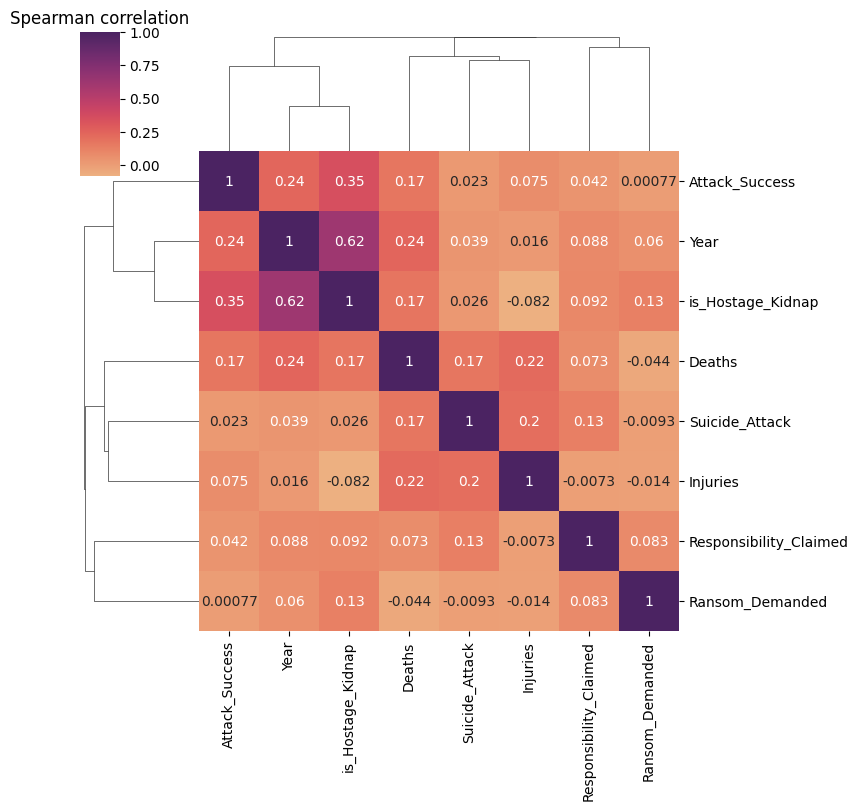

In [27]:
# Spearman correlation
spearman_corr = corr_df.corr( method = "spearman" )

# Plot spearman correlation
sb.clustermap( spearman_corr, cmap = "flare", annot = True, figsize = ( 8, 8 ) )
plt.title( "Spearman correlation" )
plt.plot(  )

</br>

From the *spearman* correlation analysis we can see that there is a decent correlation coefficient between **is_Hostage_Kidnap** and **Year**, thus, just for curiosity, we'll see what it's about. </br>
From the plot it seems like that there might be a higher change of terrorist attacks involving kidnapping from 2017 onwards.
For the study we used *logistical regression* instead of *polynomial regression* since the **is_Hostage_Kidnap** column contains boolean data stored as integers ( 0 or 1 ), meaning a polynomial model would not be able to predict or give a somewhat accurate prediction. *Logistical regression* on the other hand is the better option in this case. ( more in depth: <a href="https://en.wikipedia.org/wiki/Logistic_regression"> wiki page </a> )

Logistic Score ( degree 2 ): 0.812327506899724


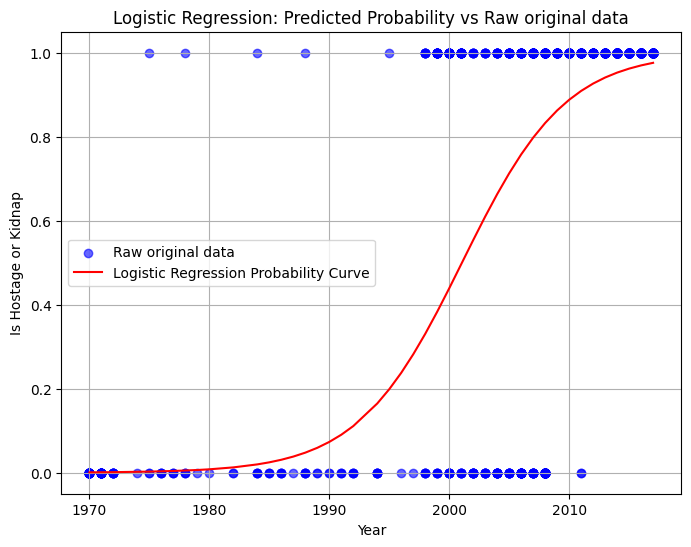

In [28]:
# NaN-free dataframe
study_df = corr_df[["Year", "is_Hostage_Kidnap"]].dropna(  ).sort_values( by = "Year" )

# Train/test split
X, y = study_df[["Year"]], study_df["is_Hostage_Kidnap"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.33, random_state = 42 )

# Polynomial features ( degree = 2, change as needed )
poly = PolynomialFeatures( degree = 2 )
X_train_poly = poly.fit_transform( X_train )
X_test_poly = poly.transform( X_test )

# Logistic regression model ( note: not polynomial regression, but logistic with polynomial features )
logistic_model = LogisticRegression( max_iter = 1000 ).fit( X_train_poly, y_train )

# Model score
prediction = logistic_model.predict( X_test_poly )
score = accuracy_score( y_test, prediction )
print( "Logistic Score ( degree 2 ):", score )

# Plot: only last graph with raw data + logistic regression probability curve
plt.figure( figsize = ( 8, 6 ) )
plt.scatter( X_test, y_test, color = "blue", label = "Raw original data", alpha = 0.6 )

# Sorted X for smooth plotting
sorted_X_test = X_test.sort_values( by = "Year" )
sorted_X_test_poly = poly.transform( sorted_X_test )
sorted_predicted_prob = logistic_model.predict_proba( sorted_X_test_poly )[:,1] # omit [:,1] to see "probability" for is_Hostage_Kidnap = 0

plt.plot( sorted_X_test, sorted_predicted_prob, color = "red", label = "Logistic Regression Probability Curve" )


# Plot info
plt.xlabel( "Year" )
plt.ylabel( "Is Hostage or Kidnap" )
plt.title( "Logistic Regression: Predicted Probability vs Raw original data" )
plt.legend(  )
plt.grid( True )
plt.show(  )

[]

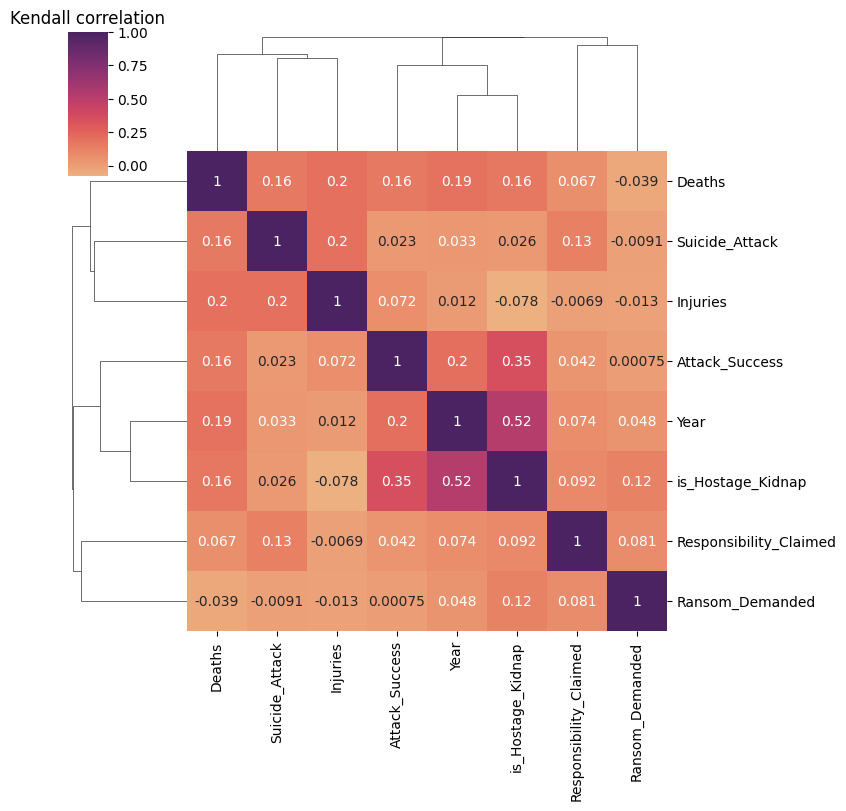

In [29]:
# Kendall correlation
kendall_corr = corr_df.corr( method = "kendall" )

# Plot kendall correlation
sb.clustermap( kendall_corr, cmap = "flare", annot = True, figsize = ( 8, 8 ) )
plt.title( "Kendall correlation" )
plt.plot(  )

</br>
<div align = "center" > 
    <h2>Sources</h2> 
    <a href = "https://www.kaggle.com/datasets/START-UMD/gtd">https://www.kaggle.com/datasets/START-UMD/gtd</a> 
    <h2>Code resources</h2>
    <a href = "https://pandas.pydata.org/docs/">https://pandas.pydata.org/docs/</a></br>
    <a href = "https://seaborn.pydata.org/">https://seaborn.pydata.org/</a></br>
    <a href = "https://scikit-learn.org/stable/">https://scikit-learn.org/stable/</a>
</div>